In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

In [3]:
# K-Means : 주어진 데이터를 K개의 클러스터로 그룹화하는 작업을 수행
# 각각의 그룹을 만들고 평균적으로 가운데 있는 점을 찍고 그 점으로부터 가까운 거리로 그룹을 만드는 것을 반복

iris = load_iris()
iris_target_names = list(map(lambda x: "_".join(x.split(" ")[:-1]), iris.feature_names))

# 데이터 프레임으로 만드는 작업
iris_df = pd.DataFrame(iris.data, columns=iris_target_names)
iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# n_clusters=3 : 군집을 3개로 묶겠다 (그래서 0, 1, 2 까지만 나옴)
# 4개의 x를 가지고 점이 찍힐텐데 n개의 그룹으로 만들겠다

model = KMeans(n_clusters=3, n_init="auto", random_state=1)
model.fit(iris_df)

KMeans(n_clusters=3, n_init='auto', random_state=1)

In [5]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [9]:
model.cluster_centers_

# 하나의 그룹마다의 중심점
# 그룹을 3개로 나누겠다고 했으니까 x가 4개씩 각각 3개가 나옴

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [10]:
predict = model.predict(iris_df)

In [11]:
iris_df["target"] = iris.target
iris_df["predict"] = predict
iris_df

# predict에서 나온 1은 버지컬러가 아니고 그냥 그룹 1번임
# 타겟은 0번 세토사는 1번 그룹에 묶여 있으니까 잘 묶인 상황


,sepal_length,sepal_width,petal_length,petal_width,target,predict
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [15]:
iris_df.groupby(["target", "predict"])["sepal_length"].count()

# target 0이 모두 predict 1인 경우가 50개 전부니까 잘 맞혔다
# target 1 중에서 3개는 2로 묶였으니까 조금 틀렸다
# target 2 중에서 14개나 0으로 묶였으니까 굉장히 못 맞힘

target  predict
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

적절한 K를 찾는 두 가지 방법

1. elbow graph
2. silhouette coefficient

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [17]:
iris_pca = PCA(n_components=2).fit_transform(iris.data)
iris_df["pca_1"] = iris_pca[:, 0]
iris_df["pca_2"] = iris_pca[:, 1]

In [18]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,predict,pca_1,pca_2
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628


In [19]:
# PCA로 차원을 2개로 만들어서 시각화 (차원이 많으면 시각화 하기 어려우니까)

marker_idx = [iris_df[iris_df["predict"]==i].index for i in range(3)]

markers = ["^", "o", "s"]

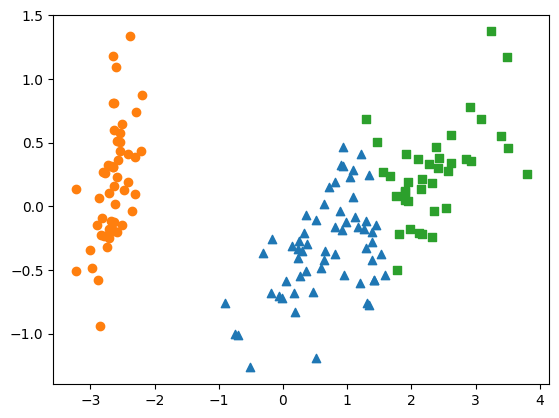

In [22]:
for i in range(len(marker_idx)):
    plt.scatter(x=iris_df.loc[marker_idx[i], "pca_1"], y=iris_df.loc[marker_idx[i], "pca_2"], marker=markers[i])

plt.show()

In [23]:
# inertia : 그룹의 중심 좌표부터 각 좌표의 거리의 제곱의 합계

inertia_list = list()
for i in range(1, 10):
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(iris.data)
    inertia_list.append(model.inertia_)

In [35]:
inertia_list

[681.3706,
 152.34795176035792,
 78.85566582597731,
 57.38387326549491,
 56.165127090301006,
 42.60579156327544,
 37.73203557312253,
 35.5734720893142,
 34.476465700965704]

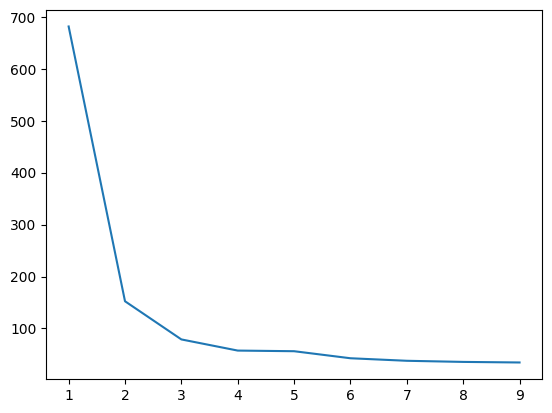

In [24]:
plt.plot(range(1, 10), inertia_list)

In [26]:
# elbow graph : 적절한 k를 찾기 위해, k를 변화시키면서 inertia의 변화가 급격한 부분을 찾자
# 위 그래프에서는 2나 3이 그에 해당됨

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [28]:
# 실루엣 스코어 : 군집분석에 대한 평가를 할 수 있는 스코어 
# silhouette coefficient : 실루엣 계수 / 각 군집간의 거리가 얼마나 효율적으로 분리되어 있는지 판별 (높을수록 좋음)
# silhouette sample : 데이터 각각의 실루엣 계수

silhouette_coef = silhouette_samples(iris.data, iris_df["predict"])
iris_df["silhouette_coef"] = silhouette_coef
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,predict,pca_1,pca_2,silhouette_coef
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.852582
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,0.814916
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,0.828797
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,0.804352
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,0.848918
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2,1.944110,0.187532,0.424561
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317,0.103125
147,6.5,3.0,5.2,2.0,2,2,1.764346,0.078859,0.316810
148,6.2,3.4,5.4,2.3,2,2,1.900942,0.116628,0.347855


In [29]:
silhouette_score_list = list()
for i in range(2, 10):
    model = KMeans(n_clusters=i, n_init="auto", random_state=1)
    model.fit(iris.data)
    silhouette_score_list.append(silhouette_score(iris.data, model.labels_))

silhouette_score_list

[0.6810461692117462,
 0.551191604619592,
 0.49535632852884987,
 0.44207674329916946,
 0.4424630109484251,
 0.4609474109834493,
 0.4513998322873973,
 0.4178499703646083]

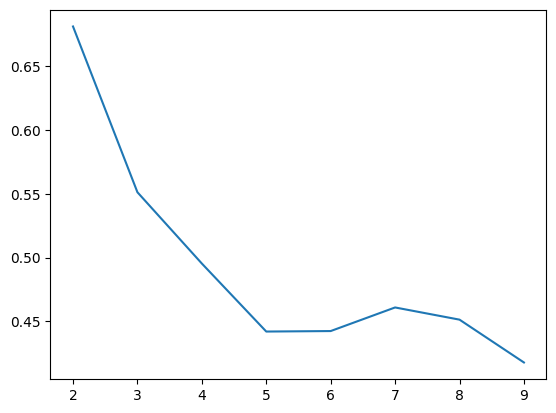

In [30]:
plt.plot(range(2, 10), silhouette_score_list)

In [31]:
# k가 2개일 때 가장 분류가 잘 됨 (2개일 때 가장 높음)
# 얼마나 효율적으로 거리가 계산이 되는지를 나타내는 것이 실루엣 계수
# 실루엣 스코어가 2이면, 2일 때 가장 잘 군집이 되었다는 의미임

In [33]:
import numpy as np

def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm 
    import math
    
    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
          
    for ind, n_cluster in enumerate(cluster_lists):
        
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

c:\Users\heeji\anaconda3\envs\dsde04\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\heeji\anaconda3\envs\dsde04\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\heeji\anaconda3\envs\dsde04\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\heeji\anaconda3\envs\dsde04\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

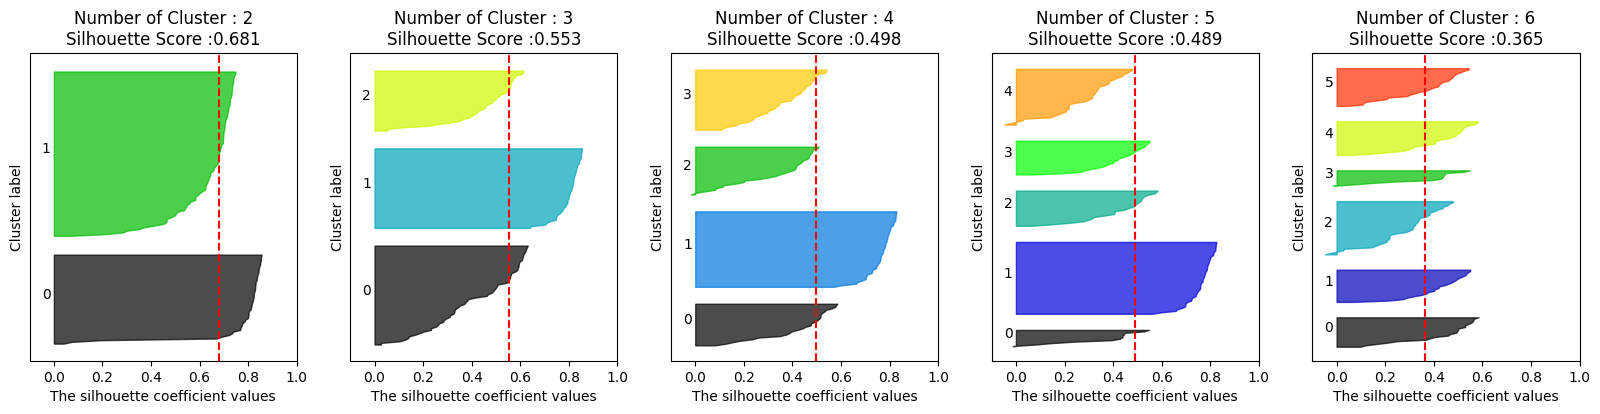

In [34]:
visualize_silhouette([2, 3, 4, 5, 6], iris.data)

# 빨간색 점선으로 판단 (실루엣 스코어)
# 4개의 특성으로는 3개의 종으로 구분을 하기는 어렵다 (실제로는 y가 4개지만)